In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yaml

In [53]:
dataset_names = ['kuhar', 'motionsense', 'uci', 'wisdm', 'realworld_thigh', 'realworld_waist']
datasets = [
    {
        'name': name,
        'data_path': f'../experiments/convtae_{name}_old/data.csv',
        'no_reducer_path': f'../execute_once_experiments/scores/no_reducer_{name}.yaml'
    }
    for name in dataset_names]
print(datasets)


[{'name': 'kuhar', 'data_path': '../experiments/convtae_kuhar_old/data.csv', 'no_reducer_path': '../execute_once_experiments/scores/no_reducer_kuhar.yaml'}, {'name': 'motionsense', 'data_path': '../experiments/convtae_motionsense_old/data.csv', 'no_reducer_path': '../execute_once_experiments/scores/no_reducer_motionsense.yaml'}, {'name': 'uci', 'data_path': '../experiments/convtae_uci_old/data.csv', 'no_reducer_path': '../execute_once_experiments/scores/no_reducer_uci.yaml'}, {'name': 'wisdm', 'data_path': '../experiments/convtae_wisdm_old/data.csv', 'no_reducer_path': '../execute_once_experiments/scores/no_reducer_wisdm.yaml'}, {'name': 'realworld_thigh', 'data_path': '../experiments/convtae_realworld_thigh_old/data.csv', 'no_reducer_path': '../execute_once_experiments/scores/no_reducer_realworld_thigh.yaml'}, {'name': 'realworld_waist', 'data_path': '../experiments/convtae_realworld_waist_old/data.csv', 'no_reducer_path': '../execute_once_experiments/scores/no_reducer_realworld_waist

# AE

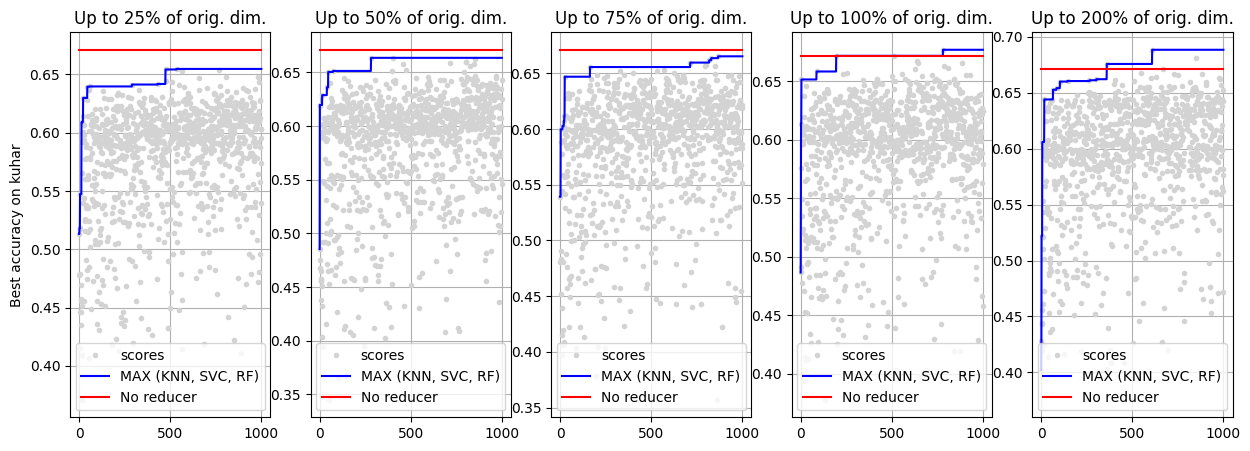

In [54]:
datasets = ['kuhar', 'motionsense', 'uci', 'wisdm', 'realworld_thigh', 'realworld_waist']
datasets = ['kuhar']


for i, dataset in enumerate(datasets):
    # Subplots for each dataset
    fig, axs = plt.subplots(1, 5, figsize=(15, 5))
    
    try:
        data25 = pd.read_csv(f'../experiments/P10_ae_{dataset}_p25/data.csv')
        data25 = data25.loc[data25['score'] > 0]
    except:
        data25 = pd.DataFrame({'Unnamed: 0': [], 'score': []})
    try:
        data50 = pd.read_csv(f'../experiments/P10_ae_{dataset}_p50/data.csv')
        data50 = data50.loc[data50['score'] > 0]
    except:
        data50 = pd.DataFrame({'Unnamed: 0': [], 'score': []})
    try:
        data75 = pd.read_csv(f'../experiments/P10_ae_{dataset}_p75/data.csv')
        data75 = data75.loc[data75['score'] > 0]
    except:
        data75 = pd.DataFrame({'Unnamed: 0': [], 'score': []})
    try:
        data100 = pd.read_csv(f'../experiments/P10_ae_{dataset}_p100/data.csv')
        data100 = data100.loc[data100['score'] > 0]
    except:
        data100 = pd.DataFrame({'Unnamed: 0': [], 'score': []})
    try:
        data200 = pd.read_csv(f'../experiments/P10_ae_{dataset}_p200/data.csv')
        data200 = data200.loc[data200['score'] > 0]
    except:
        data200 = pd.DataFrame({'Unnamed: 0': [], 'score': []})
    
    with open(f'../execute_once_experiments/_previous/TV_sb_no_reducer/scores/no_reducer_{dataset}.yaml') as f:
        score = yaml.load(f, Loader=yaml.FullLoader)
        score = score['score']
    axs[0].set_title(f'Up to 25% of orig. dim.')
    axs[0].plot(data25['Unnamed: 0'], data25['score'], '.', color='lightgray', label='scores')
    axs[0].plot(data25['score'].cummax(), color='blue', label='MAX (KNN, SVC, RF)')
    axs[0].plot(data25['Unnamed: 0'], [score]*len(data25), color='red', label='No reducer')
    axs[0].legend(loc='lower center')
    axs[0].set_ylabel(f'Best accuracy on {dataset}')
    axs[1].set_title(f'Up to 50% of orig. dim.')
    axs[1].plot(data50['Unnamed: 0'], data50['score'], '.', color='lightgray', label='scores')
    axs[1].plot(data50['score'].cummax(), color='blue', label='MAX (KNN, SVC, RF)')
    axs[1].plot(data50['Unnamed: 0'], [score]*len(data50), color='red', label='No reducer')
    axs[1].legend(loc='lower center')
    axs[2].set_title(f'Up to 75% of orig. dim.')
    axs[2].plot(data75['Unnamed: 0'], data75['score'], '.', color='lightgray', label='scores')
    axs[2].plot(data75['score'].cummax(), color='blue', label='MAX (KNN, SVC, RF)')
    axs[2].plot(data75['Unnamed: 0'], [score]*len(data75), color='red', label='No reducer')
    axs[2].legend(loc='lower center')
    axs[3].set_title(f'Up to 100% of orig. dim.')
    axs[3].plot(data100['Unnamed: 0'], data100['score'], '.', color='lightgray', label='scores')
    axs[3].plot(data100['score'].cummax(), color='blue', label='MAX (KNN, SVC, RF)')
    axs[3].plot(data100['Unnamed: 0'], [score]*len(data100), color='red', label='No reducer')
    axs[3].legend(loc='lower center')
    axs[4].set_title(f'Up to 200% of orig. dim.')
    axs[4].plot(data200['Unnamed: 0'], data200['score'], '.', color='lightgray', label='scores')
    axs[4].plot(data200['score'].cummax(), color='blue', label='MAX (KNN, SVC, RF)')
    axs[4].plot(data200['Unnamed: 0'], [score]*len(data200), color='red', label='No reducer')
    axs[4].legend(loc='lower center')
    axs[0].grid()
    axs[1].grid()
    axs[2].grid()
    axs[3].grid()
    axs[4].grid()
    plt.show()

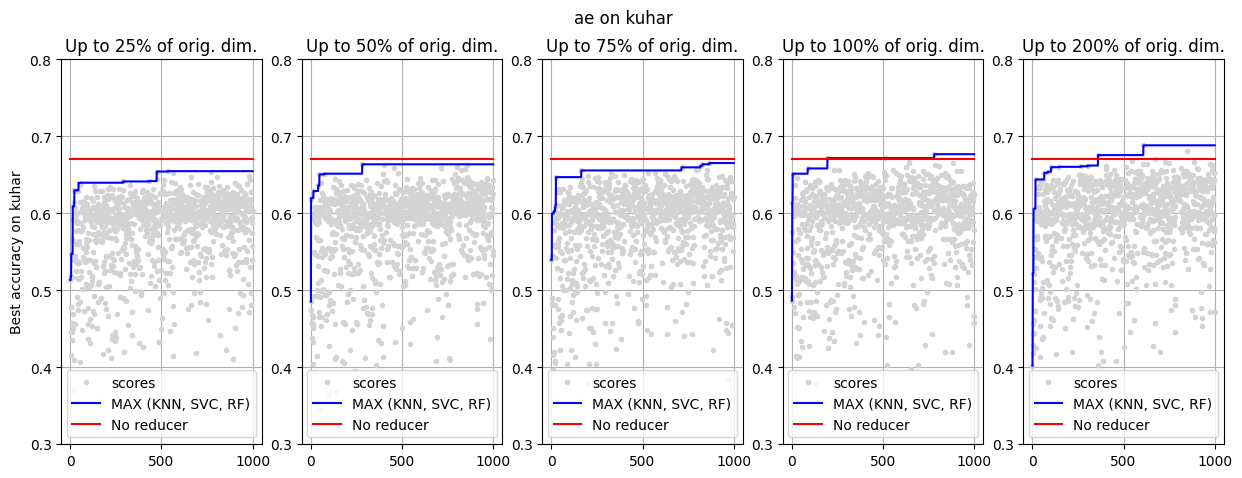

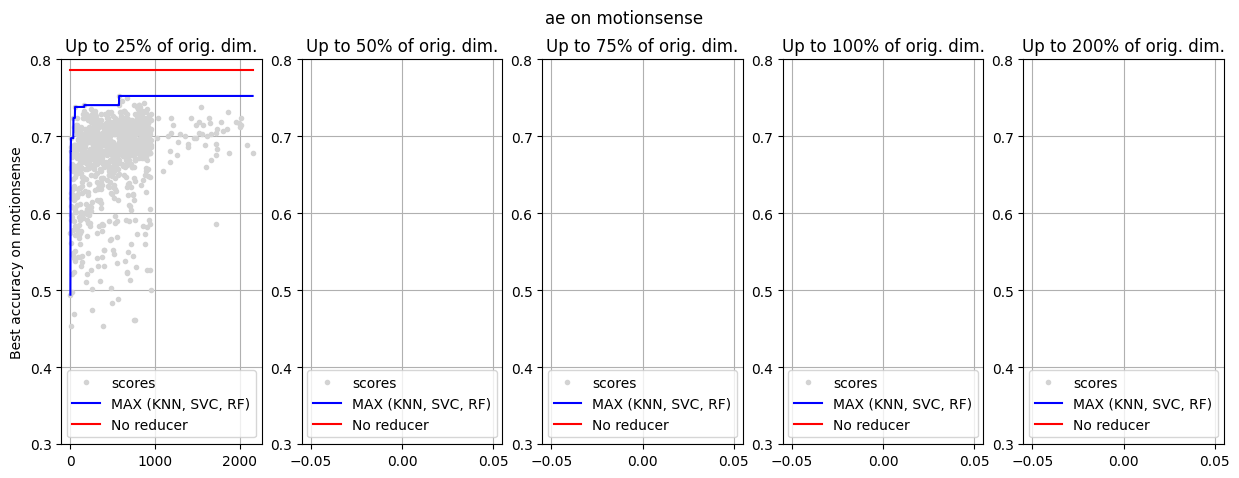

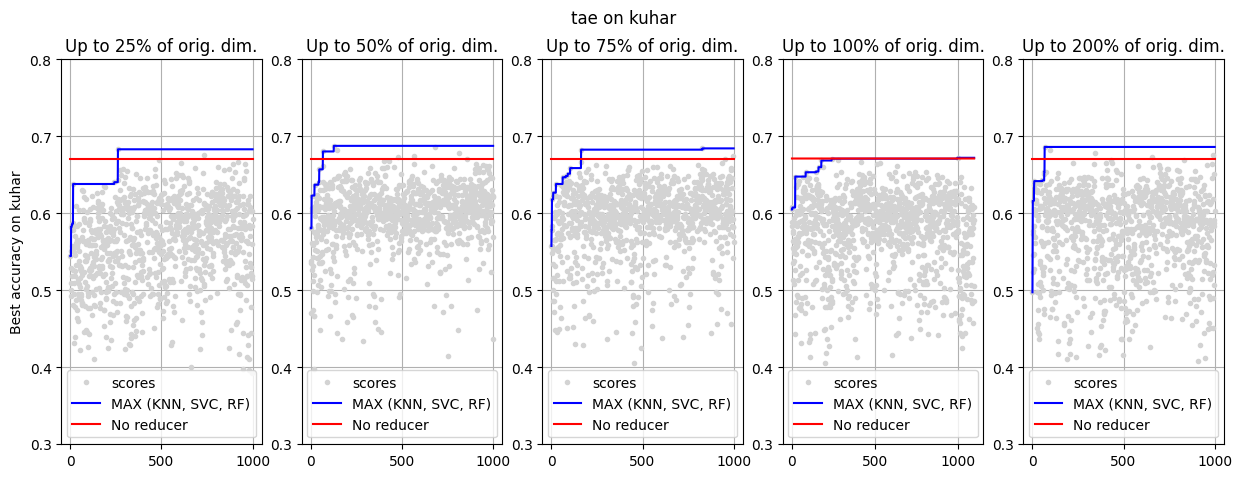

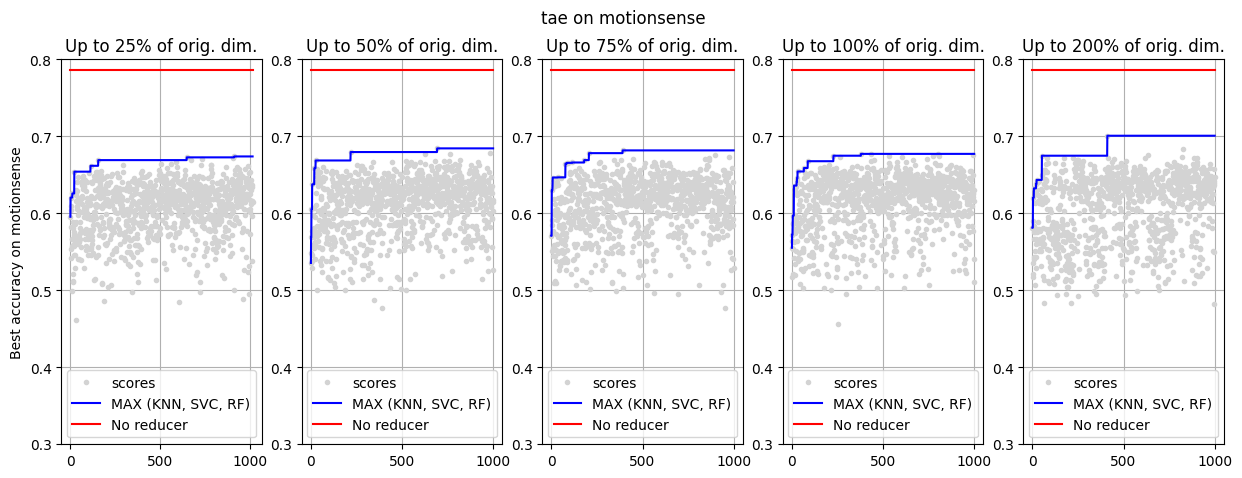

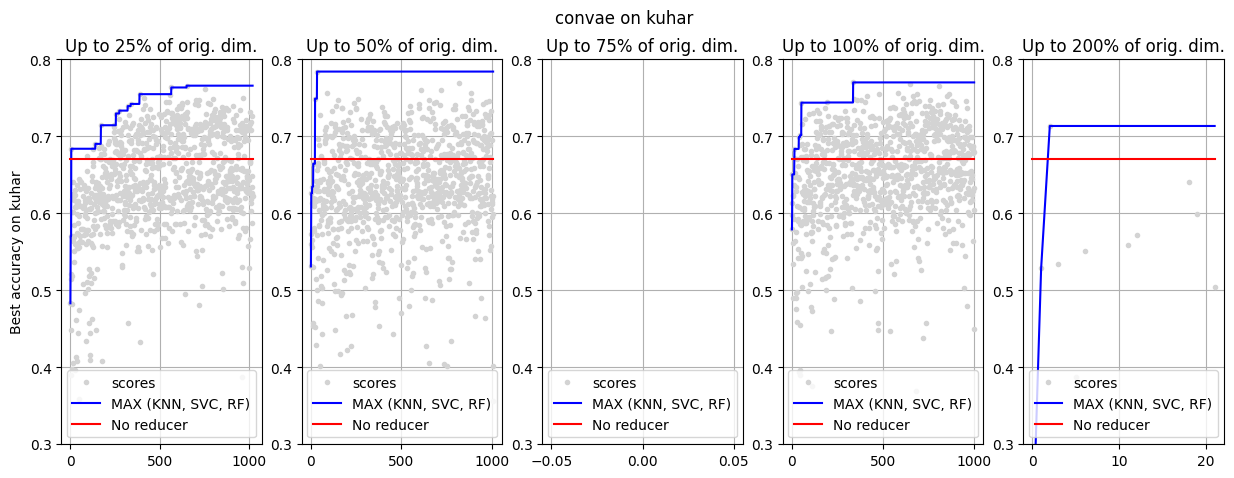

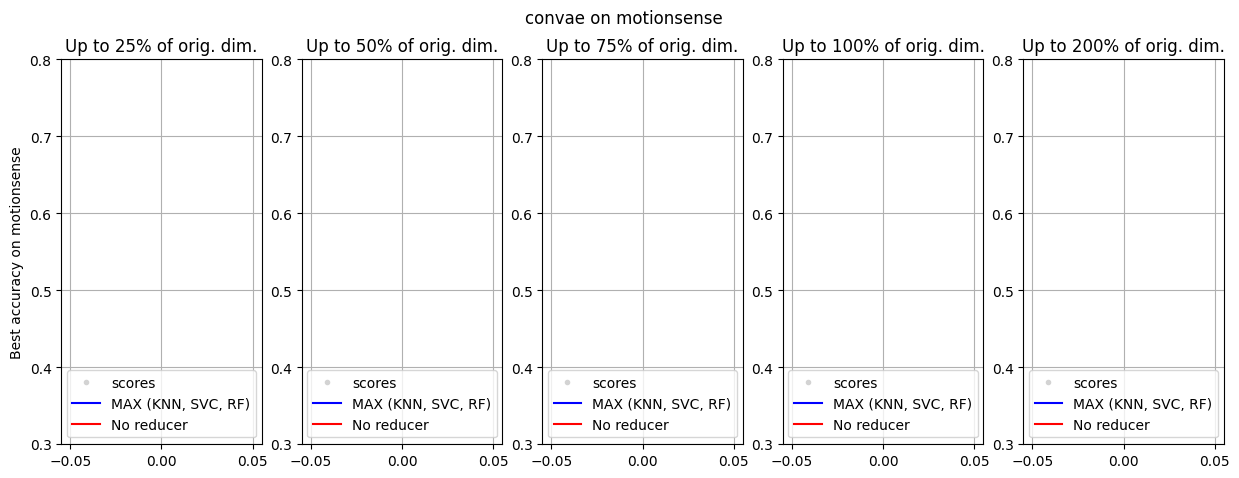

In [55]:
models = ['ae', 'tae', 'convae']
datasets = ['kuhar', 'motionsense', 'uci', 'wisdm', 'realworld_thigh', 'realworld_waist']
datasets = ['kuhar', 'motionsense']
y_lim = [0.3, 0.8]
for model in models:
    for i, dataset in enumerate(datasets):
        # Subplots for each dataset
        fig, axs = plt.subplots(1, 5, figsize=(15, 5))
        plt.suptitle(f'{model} on {dataset}')
        try:
            data25 = pd.read_csv(f'../experiments/P10_{model}_{dataset}_p25/data.csv')
            data25 = data25.loc[data25['score'] > 0]
        except:
            data25 = pd.DataFrame({'Unnamed: 0': [], 'score': []})
        try:
            data50 = pd.read_csv(f'../experiments/P10_{model}_{dataset}_p50/data.csv')
            data50 = data50.loc[data50['score'] > 0]
        except:
            data50 = pd.DataFrame({'Unnamed: 0': [], 'score': []})
        try:
            data75 = pd.read_csv(f'../experiments/P10_{model}_{dataset}_p75/data.csv')
            data75 = data75.loc[data75['score'] > 0]
        except:
            data75 = pd.DataFrame({'Unnamed: 0': [], 'score': []})
        try:
            data100 = pd.read_csv(f'../experiments/P10_{model}_{dataset}_p100/data.csv')
            data100 = data100.loc[data100['score'] > 0]
        except:
            data100 = pd.DataFrame({'Unnamed: 0': [], 'score': []})
        try:
            data200 = pd.read_csv(f'../experiments/P10_{model}_{dataset}_p200/data.csv')
            data200 = data200.loc[data200['score'] > 0]
        except:
            data200 = pd.DataFrame({'Unnamed: 0': [], 'score': []})
        
        with open(f'../execute_once_experiments/_previous/TV_sb_no_reducer/scores/no_reducer_{dataset}.yaml') as f:
            score = yaml.load(f, Loader=yaml.FullLoader)
            score = score['score']
        # Plot data on 25%
        axs[0].set_title(f'Up to 25% of orig. dim.')
        axs[0].plot(data25['Unnamed: 0'], data25['score'], '.', color='lightgray', label='scores')
        axs[0].plot(data25['score'].cummax(), color='blue', label='MAX (KNN, SVC, RF)')
        axs[0].plot(data25['Unnamed: 0'], [score]*len(data25), color='red', label='No reducer')
        axs[0].legend(loc='lower center')
        axs[0].set_ylabel(f'Best accuracy on {dataset}')
        # Plot data on 50%
        axs[1].set_title(f'Up to 50% of orig. dim.')
        axs[1].plot(data50['Unnamed: 0'], data50['score'], '.', color='lightgray', label='scores')
        axs[1].plot(data50['score'].cummax(), color='blue', label='MAX (KNN, SVC, RF)')
        axs[1].plot(data50['Unnamed: 0'], [score]*len(data50), color='red', label='No reducer')
        axs[1].legend(loc='lower center')
        # Plot data on 75%
        axs[2].set_title(f'Up to 75% of orig. dim.')
        axs[2].plot(data75['Unnamed: 0'], data75['score'], '.', color='lightgray', label='scores')
        axs[2].plot(data75['score'].cummax(), color='blue', label='MAX (KNN, SVC, RF)')
        axs[2].plot(data75['Unnamed: 0'], [score]*len(data75), color='red', label='No reducer')
        axs[2].legend(loc='lower center')
        # Plot data on 100%
        axs[3].set_title(f'Up to 100% of orig. dim.')
        axs[3].plot(data100['Unnamed: 0'], data100['score'], '.', color='lightgray', label='scores')
        axs[3].plot(data100['score'].cummax(), color='blue', label='MAX (KNN, SVC, RF)')
        axs[3].plot(data100['Unnamed: 0'], [score]*len(data100), color='red', label='No reducer')
        axs[3].legend(loc='lower center')
        # Plot data on 200%
        axs[4].set_title(f'Up to 200% of orig. dim.')
        axs[4].plot(data200['Unnamed: 0'], data200['score'], '.', color='lightgray', label='scores')
        axs[4].plot(data200['score'].cummax(), color='blue', label='MAX (KNN, SVC, RF)')
        axs[4].plot(data200['Unnamed: 0'], [score]*len(data200), color='red', label='No reducer')
        axs[4].legend(loc='lower center')
        axs[0].grid()
        axs[1].grid()
        axs[2].grid()
        axs[3].grid()
        axs[4].grid()
        axs[0].set_ylim(y_lim)
        axs[1].set_ylim(y_lim)
        axs[2].set_ylim(y_lim)
        axs[3].set_ylim(y_lim)
        axs[4].set_ylim(y_lim)
        plt.show()

## Fixed percentage

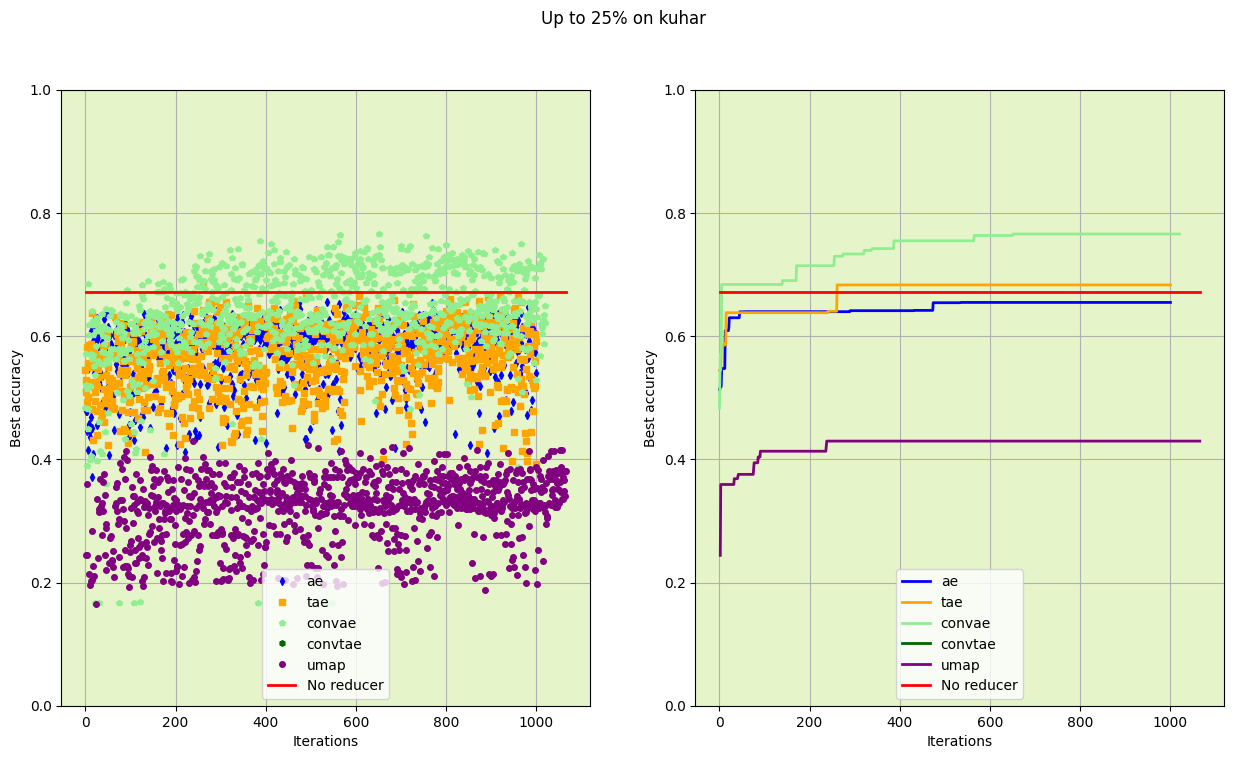

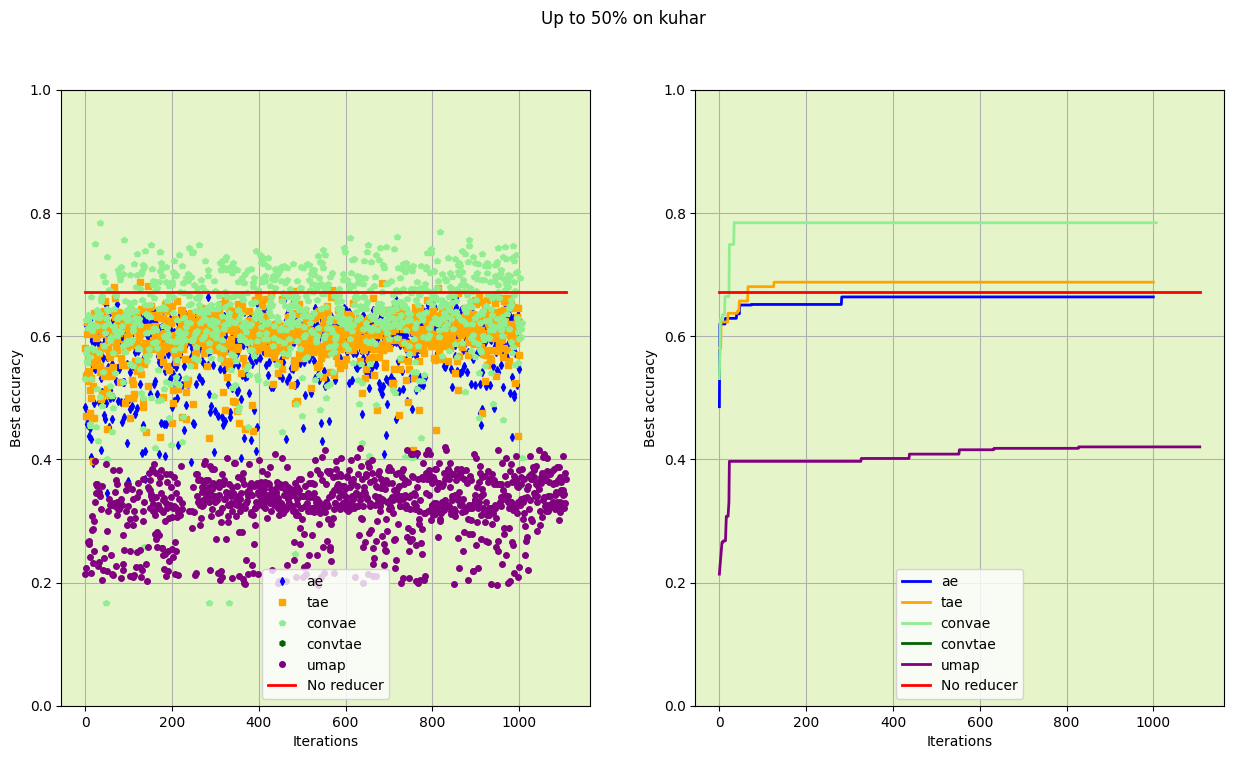

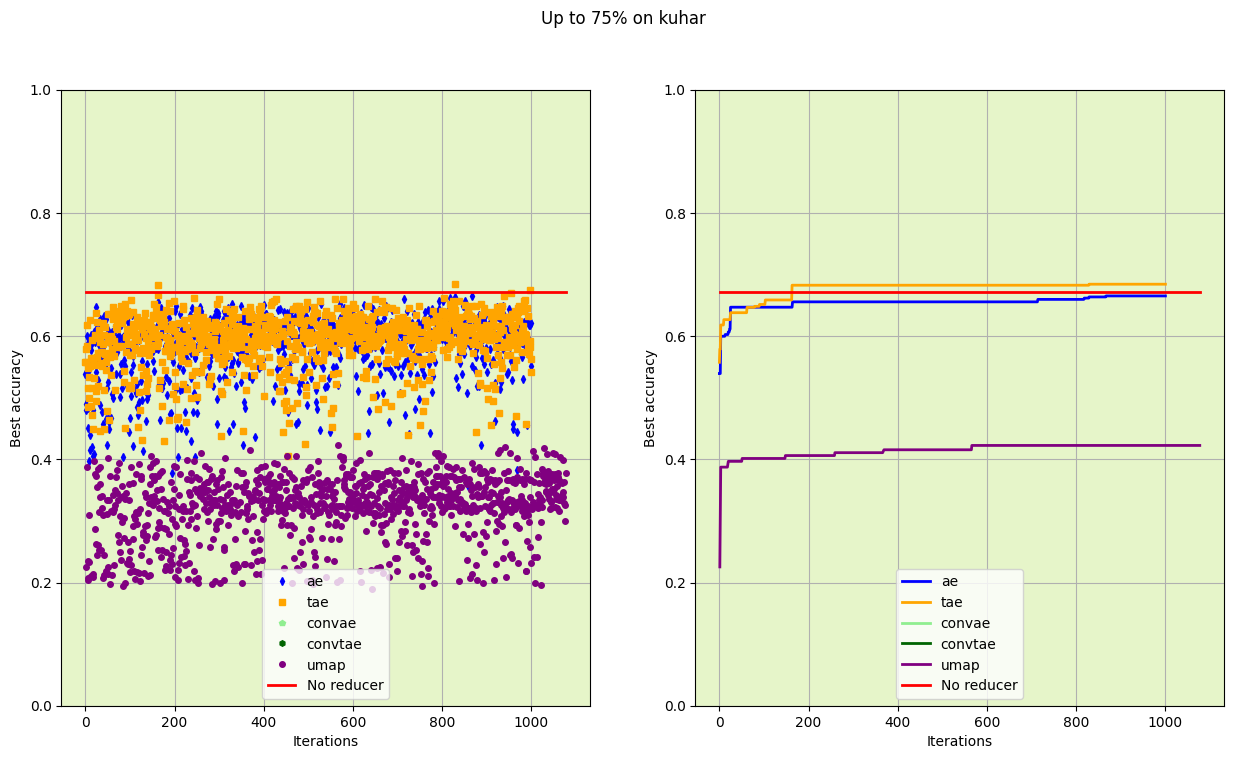

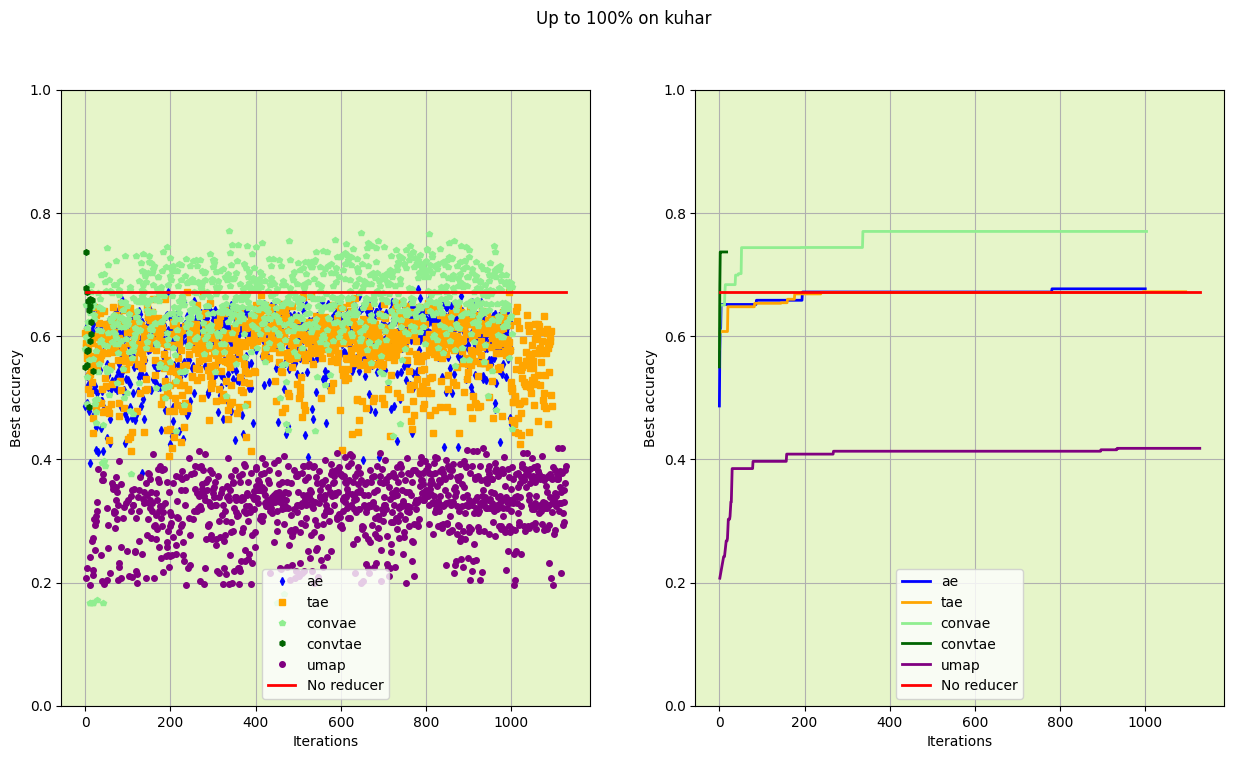

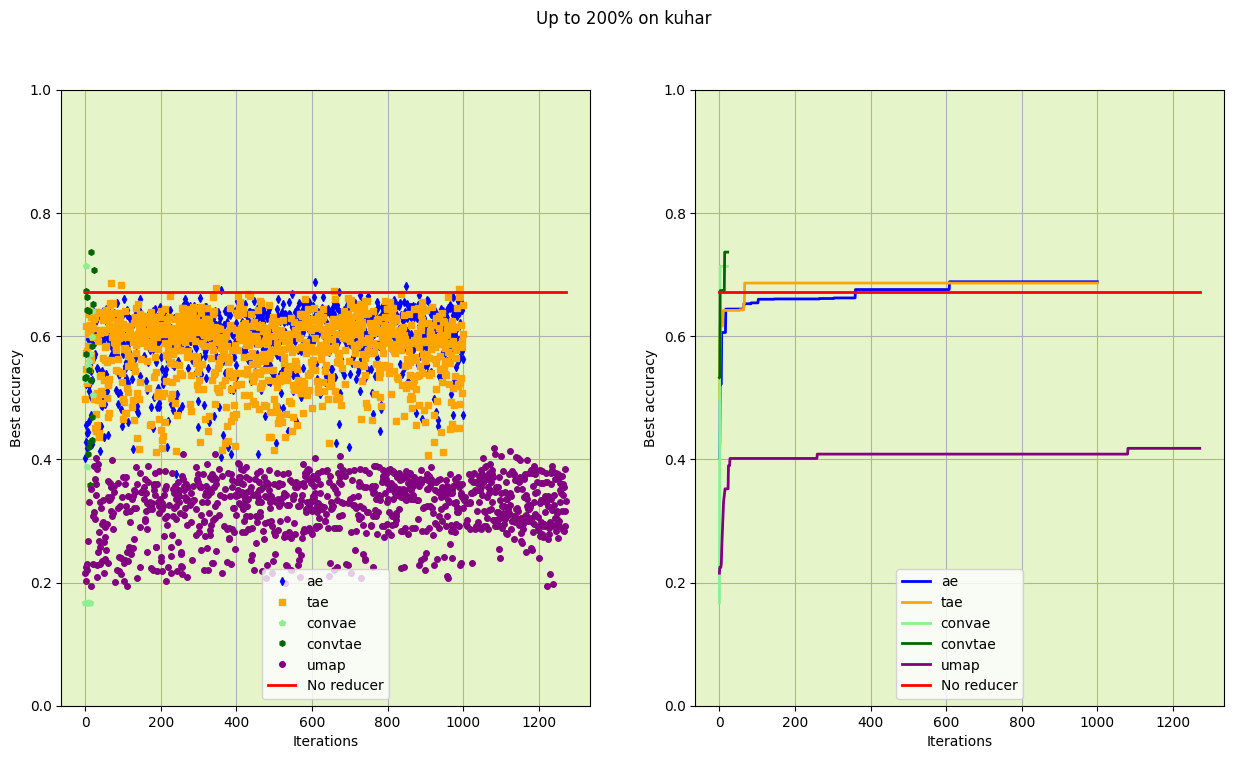

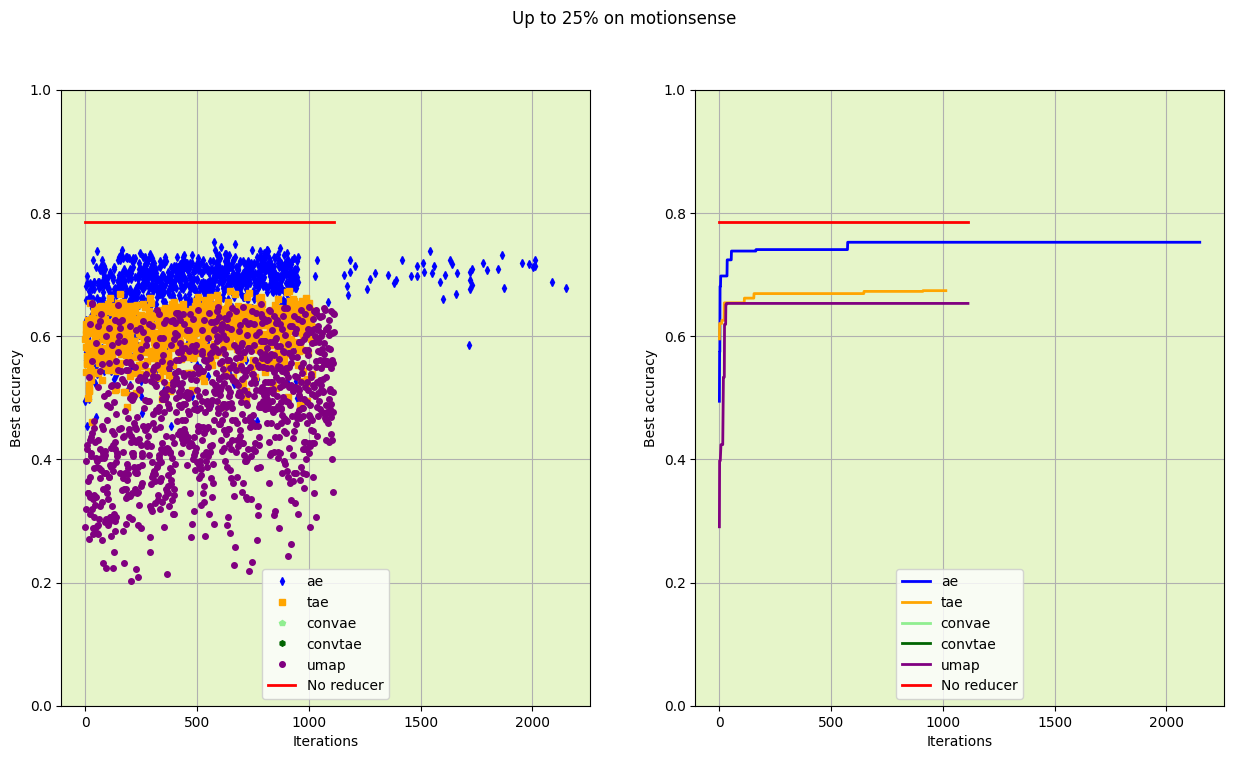

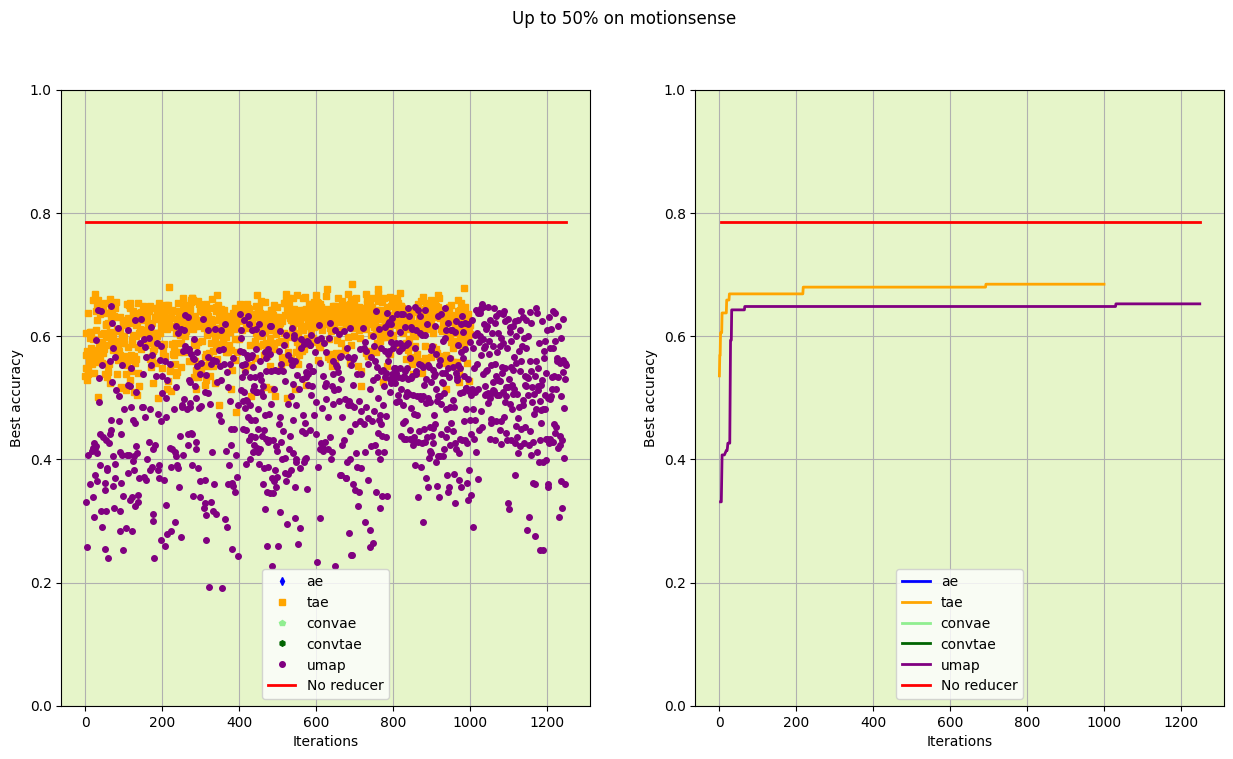

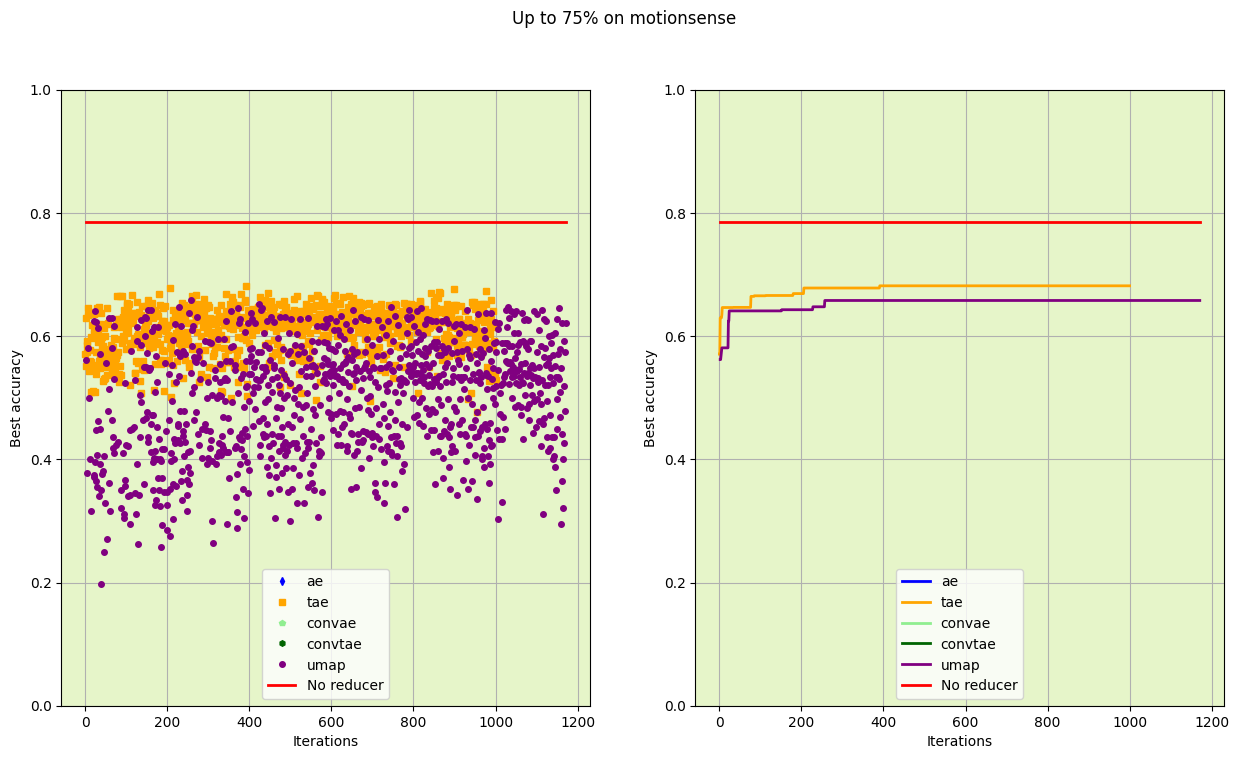

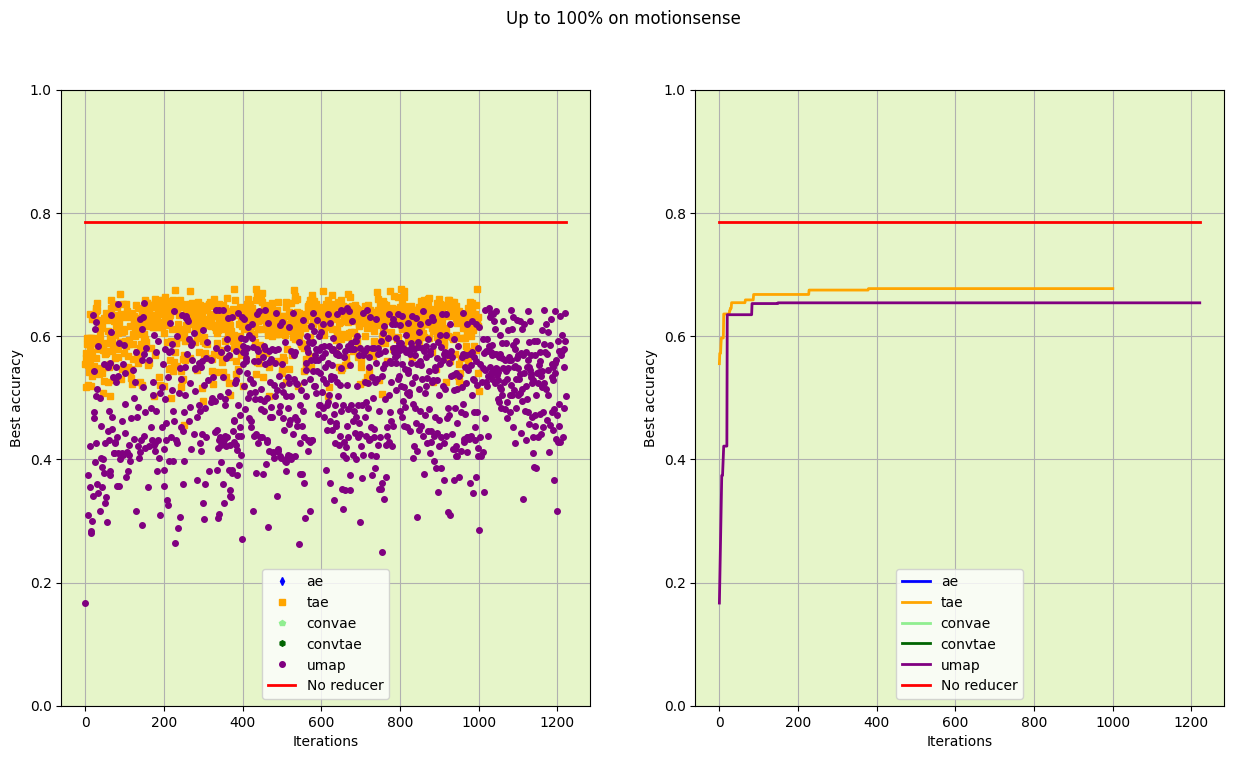

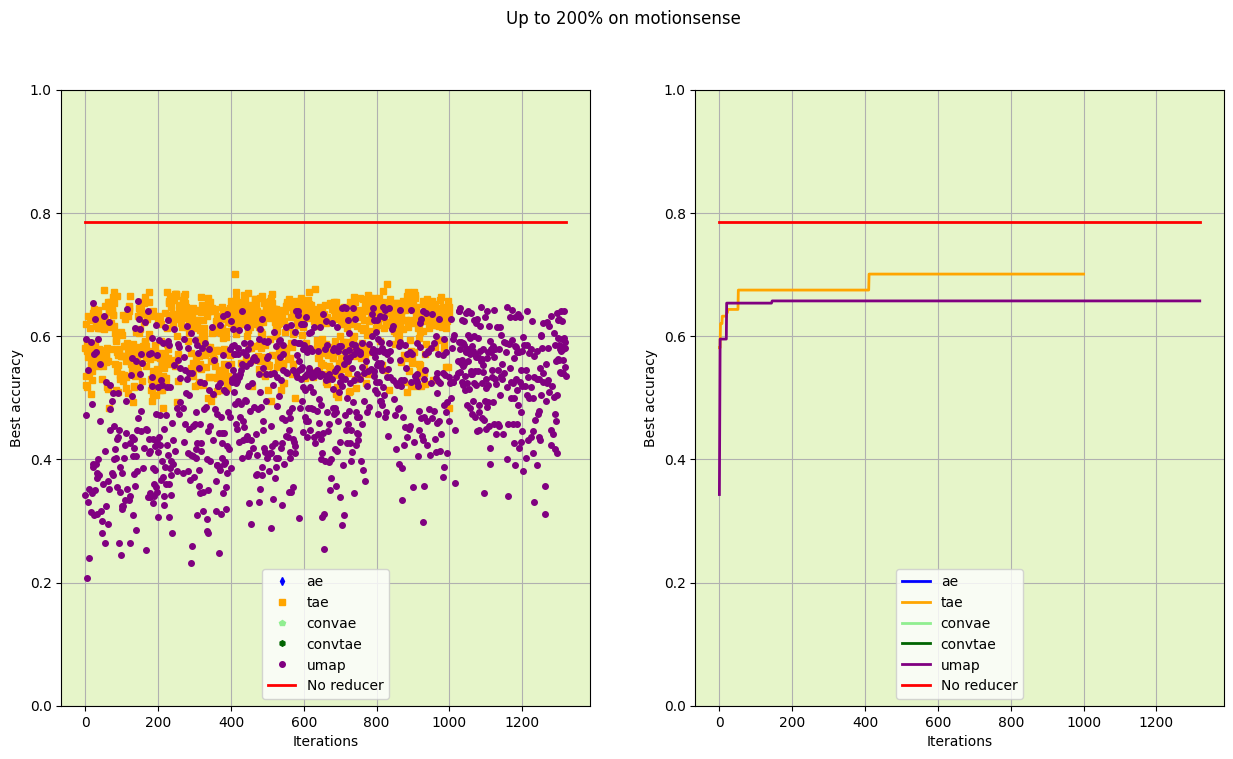

In [56]:
models = ['ae', 'tae', 'convae', 'convtae', 'umap']
markers = ['d', 's', 'p', 'h', 'o']
colors = ['blue', 'orange', 'lightgreen', 'darkgreen', 'purple']
datasets = ['kuhar', 'motionsense', 'uci', 'wisdm', 'realworld_thigh', 'realworld_waist']
datasets = ['kuhar', 'motionsense']
percentages = [25, 50, 75, 100, 200]
y_lim = [0, 1]

for dataset in datasets:
    with open(f'../execute_once_experiments/_previous/TV_sb_no_reducer/scores/no_reducer_{dataset}.yaml') as f:
        no_reducer_score = yaml.load(f, Loader=yaml.FullLoader)
        no_reducer_score = no_reducer_score['score']
    
    for i, percentage in enumerate(percentages):
        # Subplots for each dataset
        fig, axs = plt.subplots(1, 2, figsize=(15, 8))
        plt.suptitle(f'Up to {percentage}% on {dataset}')
        for j, model in enumerate(models):
            experiment_name = f'P10_{model}_{dataset}_p{percentage}'
            if model == 'umap':
                experiment_name = experiment_name[4:]
            try:
                data = pd.read_csv(f'../experiments/{experiment_name}/data.csv')
                data = data.loc[data['score'] > 0]
            except:
                data = pd.DataFrame({'Unnamed: 0': [], 'score': []})
            axs[0].plot(data['Unnamed: 0'], data['score'], markers[j], color=colors[j], markersize=4, label=model)
            axs[1].plot(data['score'].cummax(), color=colors[j], linewidth=2, label=model)
        axs[0].plot(data['Unnamed: 0'], [no_reducer_score]*len(data), color='red', linewidth=2, label='No reducer')
        axs[0].legend(loc='lower center')
        axs[0].set_ylabel(f'Best accuracy')
        axs[0].set_xlabel('Iterations')
        axs[0].grid()
        axs[0].set_ylim(y_lim)
        axs[0].set_facecolor('#e6f5c9')
        axs[1].plot(data['Unnamed: 0'], [no_reducer_score]*len(data), color='red', linewidth=2, label='No reducer')
        axs[1].legend(loc='lower center')
        axs[1].set_ylabel(f'Best accuracy')
        axs[1].set_xlabel('Iterations')
        axs[1].grid()
        axs[1].set_ylim(y_lim)
        axs[1].set_facecolor('#e6f5c9')

        plt.show()

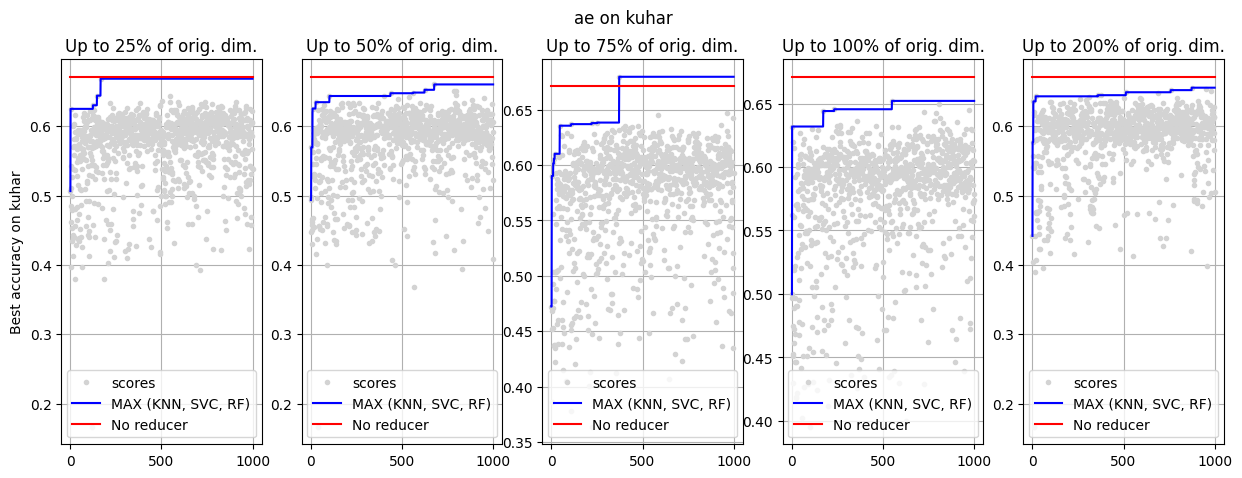

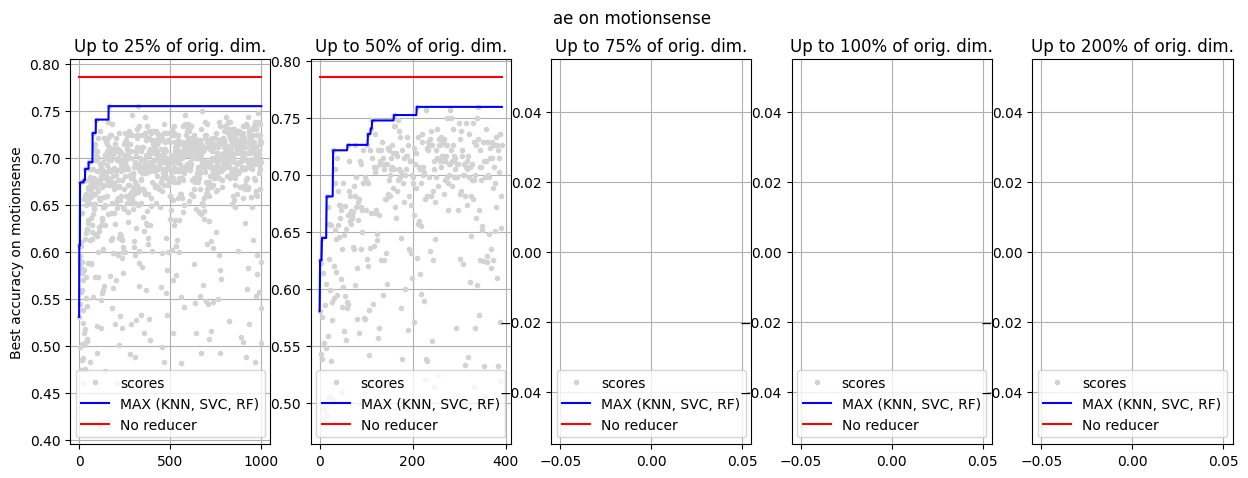

In [57]:
models = ['ae']
datasets = ['kuhar', 'motionsense', 'uci', 'wisdm', 'realworld_thigh', 'realworld_waist']
datasets = ['kuhar', 'motionsense']

for model in models:
    for i, dataset in enumerate(datasets):
        # Subplots for each dataset
        fig, axs = plt.subplots(1, 5, figsize=(15, 5))
        plt.suptitle(f'{model} on {dataset}')
        
        try:
            data25 = pd.read_csv(f'../experiments/{model}_{dataset}_p25/data.csv')
            data25 = data25.loc[data25['score'] > 0]
        except:
            data25 = pd.DataFrame({'Unnamed: 0': [], 'score': []})
        try:
            data50 = pd.read_csv(f'../experiments/{model}_{dataset}_p50/data.csv')
            data50 = data50.loc[data50['score'] > 0]
        except:
            data50 = pd.DataFrame({'Unnamed: 0': [], 'score': []})
        try:
            data75 = pd.read_csv(f'../experiments/{model}_{dataset}_p75/data.csv')
            data75 = data75.loc[data75['score'] > 0]
        except:
            data75 = pd.DataFrame({'Unnamed: 0': [], 'score': []})
        try:
            data100 = pd.read_csv(f'../experiments/{model}_{dataset}_p100/data.csv')
            data100 = data100.loc[data100['score'] > 0]
        except:
            data100 = pd.DataFrame({'Unnamed: 0': [], 'score': []})
        try:
            data200 = pd.read_csv(f'../experiments/{model}_{dataset}_p200/data.csv')
            data200 = data200.loc[data200['score'] > 0]
        except:
            data200 = pd.DataFrame({'Unnamed: 0': [], 'score': []})
        
        with open(f'../execute_once_experiments/_previous/TV_sb_no_reducer/scores/no_reducer_{dataset}.yaml') as f:
            score = yaml.load(f, Loader=yaml.FullLoader)
            score = score['score']
        axs[0].set_title(f'Up to 25% of orig. dim.')
        axs[0].plot(data25['Unnamed: 0'], data25['score'], '.', color='lightgray', label='scores')
        axs[0].plot(data25['score'].cummax(), color='blue', label='MAX (KNN, SVC, RF)')
        axs[0].plot(data25['Unnamed: 0'], [score]*len(data25), color='red', label='No reducer')
        axs[0].legend(loc='lower center')
        axs[0].set_ylabel(f'Best accuracy on {dataset}')
        axs[1].set_title(f'Up to 50% of orig. dim.')
        axs[1].plot(data50['Unnamed: 0'], data50['score'], '.', color='lightgray', label='scores')
        axs[1].plot(data50['score'].cummax(), color='blue', label='MAX (KNN, SVC, RF)')
        axs[1].plot(data50['Unnamed: 0'], [score]*len(data50), color='red', label='No reducer')
        axs[1].legend(loc='lower center')
        axs[2].set_title(f'Up to 75% of orig. dim.')
        axs[2].plot(data75['Unnamed: 0'], data75['score'], '.', color='lightgray', label='scores')
        axs[2].plot(data75['score'].cummax(), color='blue', label='MAX (KNN, SVC, RF)')
        axs[2].plot(data75['Unnamed: 0'], [score]*len(data75), color='red', label='No reducer')
        axs[2].legend(loc='lower center')
        axs[3].set_title(f'Up to 100% of orig. dim.')
        axs[3].plot(data100['Unnamed: 0'], data100['score'], '.', color='lightgray', label='scores')
        axs[3].plot(data100['score'].cummax(), color='blue', label='MAX (KNN, SVC, RF)')
        axs[3].plot(data100['Unnamed: 0'], [score]*len(data100), color='red', label='No reducer')
        axs[3].legend(loc='lower center')
        axs[4].set_title(f'Up to 200% of orig. dim.')
        axs[4].plot(data200['Unnamed: 0'], data200['score'], '.', color='lightgray', label='scores')
        axs[4].plot(data200['score'].cummax(), color='blue', label='MAX (KNN, SVC, RF)')
        axs[4].plot(data200['Unnamed: 0'], [score]*len(data200), color='red', label='No reducer')
        axs[4].legend(loc='lower center')
        axs[0].grid()
        axs[1].grid()
        axs[2].grid()
        axs[3].grid()
        axs[4].grid()
        plt.show()

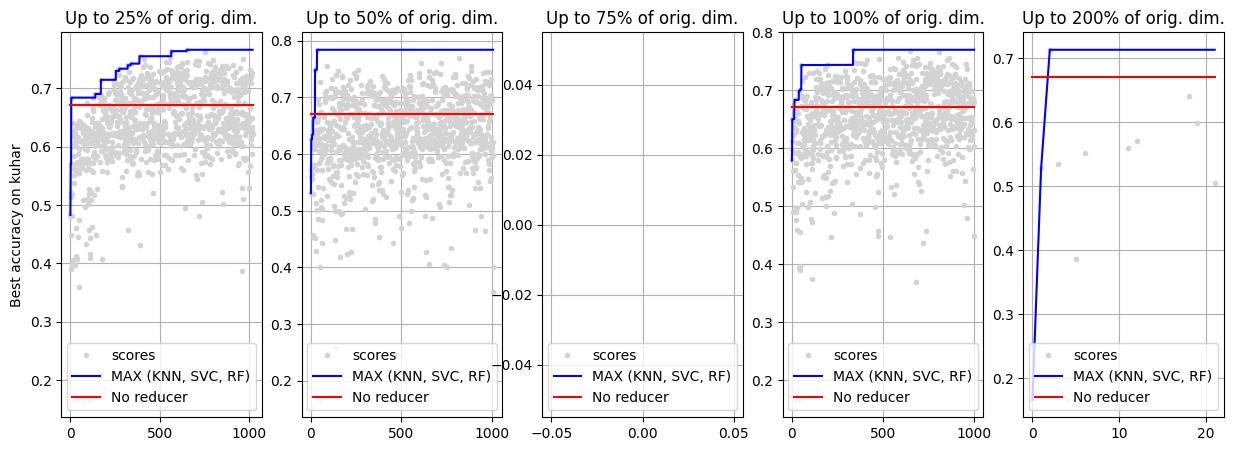

In [58]:
datasets = ['kuhar', 'motionsense', 'uci', 'wisdm', 'realworld_thigh', 'realworld_waist']
datasets = ['kuhar']


for i, dataset in enumerate(datasets):
    # Subplots for each dataset
    fig, axs = plt.subplots(1, 5, figsize=(15, 5))
    
    try:
        data25 = pd.read_csv(f'../experiments/P10_convae_{dataset}_p25/data.csv')
        data25 = data25.loc[data25['score'] > 0]
    except:
        data25 = pd.DataFrame({'Unnamed: 0': [], 'score': []})
    try:
        data50 = pd.read_csv(f'../experiments/P10_convae_{dataset}_p50/data.csv')
        data50 = data50.loc[data50['score'] > 0]
    except:
        data50 = pd.DataFrame({'Unnamed: 0': [], 'score': []})
    try:
        data75 = pd.read_csv(f'../experiments/P10_convae_{dataset}_p75/data.csv')
        data75 = data75.loc[data75['score'] > 0]
    except:
        data75 = pd.DataFrame({'Unnamed: 0': [], 'score': []})
    try:
        data100 = pd.read_csv(f'../experiments/P10_convae_{dataset}_p100/data.csv')
        data100 = data100.loc[data100['score'] > 0]
    except:
        data100 = pd.DataFrame({'Unnamed: 0': [], 'score': []})
    try:
        data200 = pd.read_csv(f'../experiments/P10_convae_{dataset}_p200/data.csv')
        data200 = data200.loc[data200['score'] > 0]
    except:
        data200 = pd.DataFrame({'Unnamed: 0': [], 'score': []})
    
    with open(f'../execute_once_experiments/_previous/TV_sb_no_reducer/scores/no_reducer_{dataset}.yaml') as f:
        score = yaml.load(f, Loader=yaml.FullLoader)
        score = score['score']
    axs[0].set_title(f'Up to 25% of orig. dim.')
    axs[0].plot(data25['Unnamed: 0'], data25['score'], '.', color='lightgray', label='scores')
    axs[0].plot(data25['score'].cummax(), color='blue', label='MAX (KNN, SVC, RF)')
    axs[0].plot(data25['Unnamed: 0'], [score]*len(data25), color='red', label='No reducer')
    axs[0].legend(loc='lower center')
    axs[0].set_ylabel(f'Best accuracy on {dataset}')
    axs[1].set_title(f'Up to 50% of orig. dim.')
    axs[1].plot(data50['Unnamed: 0'], data50['score'], '.', color='lightgray', label='scores')
    axs[1].plot(data50['score'].cummax(), color='blue', label='MAX (KNN, SVC, RF)')
    axs[1].plot(data50['Unnamed: 0'], [score]*len(data50), color='red', label='No reducer')
    axs[1].legend(loc='lower center')
    axs[2].set_title(f'Up to 75% of orig. dim.')
    axs[2].plot(data75['Unnamed: 0'], data75['score'], '.', color='lightgray', label='scores')
    axs[2].plot(data75['score'].cummax(), color='blue', label='MAX (KNN, SVC, RF)')
    axs[2].plot(data75['Unnamed: 0'], [score]*len(data75), color='red', label='No reducer')
    axs[2].legend(loc='lower center')
    axs[3].set_title(f'Up to 100% of orig. dim.')
    axs[3].plot(data100['Unnamed: 0'], data100['score'], '.', color='lightgray', label='scores')
    axs[3].plot(data100['score'].cummax(), color='blue', label='MAX (KNN, SVC, RF)')
    axs[3].plot(data100['Unnamed: 0'], [score]*len(data100), color='red', label='No reducer')
    axs[3].legend(loc='lower center')
    axs[4].set_title(f'Up to 200% of orig. dim.')
    axs[4].plot(data200['Unnamed: 0'], data200['score'], '.', color='lightgray', label='scores')
    axs[4].plot(data200['score'].cummax(), color='blue', label='MAX (KNN, SVC, RF)')
    axs[4].plot(data200['Unnamed: 0'], [score]*len(data200), color='red', label='No reducer')
    axs[4].legend(loc='lower center')
    axs[0].grid()
    axs[1].grid()
    axs[2].grid()
    axs[3].grid()
    axs[4].grid()
    plt.show()

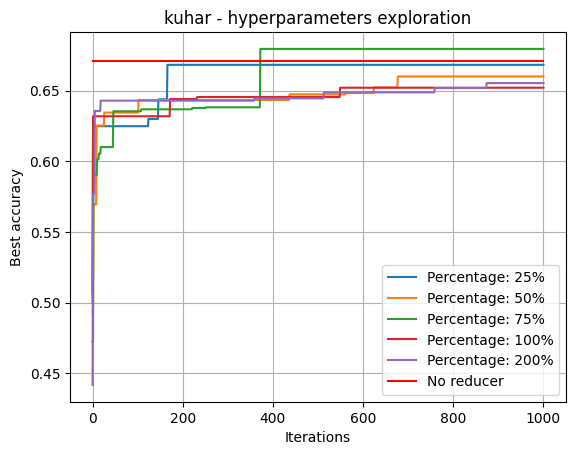

In [59]:
datasets = ['kuhar', 'motionsense', 'uci', 'wisdm', 'realworld_thigh', 'realworld_waist']
datasets = ['kuhar']
colors = ['green', 'blue', 'orange', 'red', 'purple', 'brown']
percentages = [25, 50, 75, 100, 200]

for i, dataset in enumerate(datasets):
    best_scores = []
    for p in percentages:
        data = pd.read_csv(f'../experiments/ae_{dataset}_p{p}/data.csv')
        data = data.loc[data['score'] > 0]
        best_scores.append(data['score'].max())
        plt.plot(data['score'].cummax(), label=f'Percentage: {p}%')
    
    with open(f'../execute_once_experiments/_previous/TV_sb_no_reducer/scores/no_reducer_{dataset}.yaml') as f:
        score_no_reducer = yaml.load(f, Loader=yaml.FullLoader)
        score_no_reducer = score_no_reducer['score']
        plt.plot(data['Unnamed: 0'], [score_no_reducer]*len(data['Unnamed: 0']), color='red', label='No reducer')
    plt.title(f'{dataset} - hyperparameters exploration')
    plt.ylabel('Best accuracy')
    plt.xlabel('Iterations')
    plt.legend()
    plt.grid()
    plt.show()
    


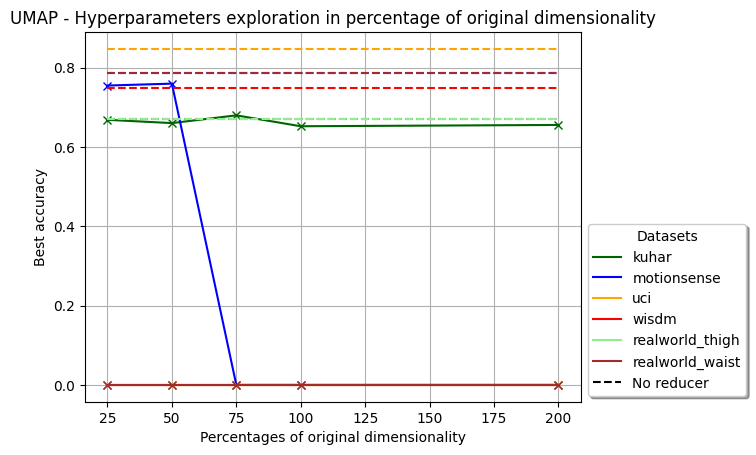

In [60]:
datasets = ['kuhar', 'motionsense', 'uci', 'wisdm', 'realworld_thigh', 'realworld_waist']
# datasets = ['kuhar', 'motionsense', 'realworld_thigh', 'realworld_waist']
colors = ['darkgreen', 'blue', 'orange', 'red', 'lightgreen', 'brown']
percentages = [25, 50, 75, 100, 200]

for i, dataset in enumerate(datasets):
    best_scores = []
    for p in percentages:
        try:
            data = pd.read_csv(f'../experiments/ae_{dataset}_p{p}/data.csv')
            data = data.loc[data['score'] > 0]
            best_scores.append(data['score'].max())
        except:
            best_scores.append(0)
    plt.plot(percentages, best_scores, 'x', color=colors[i])
    plt.plot(percentages, best_scores, '-', label=f'{dataset}', color=colors[i])
    
    with open(f'../execute_once_experiments/_previous/TV_sb_no_reducer/scores/no_reducer_{dataset}.yaml') as f:
        score_no_reducer = yaml.load(f, Loader=yaml.FullLoader)
        score_no_reducer = score_no_reducer['score']
    plt.plot(percentages, [score_no_reducer]*len(percentages), '--', color=colors[i])
plt.plot(np.NaN, np.NaN, '--', color=[0, 0, 0], label='No reducer' )

plt.title(f'UMAP - Hyperparameters exploration in percentage of original dimensionality')
plt.ylabel('Best accuracy')
plt.xlabel('Percentages of original dimensionality')
plt.legend(bbox_to_anchor=(1.0, 0.5), fancybox=True, shadow=True, ncol=1, title='Datasets')
plt.grid()
plt.show()
    


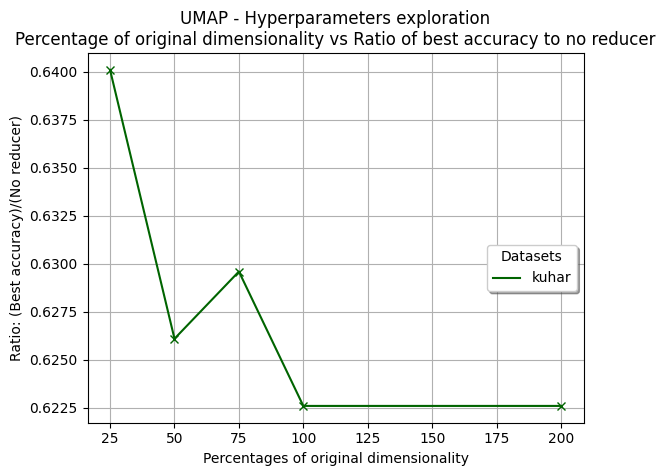

In [61]:
datasets = ['kuhar', 'motionsense', 'uci', 'wisdm', 'realworld_thigh', 'realworld_waist']
datasets = ['kuhar']
colors = ['darkgreen', 'blue', 'orange', 'red', 'lightgreen', 'brown']
percentages = [25, 50, 75, 100, 200]

for i, dataset in enumerate(datasets):
    best_scores = []
    with open(f'../execute_once_experiments/_previous/TV_sb_no_reducer/scores/no_reducer_{dataset}.yaml') as f:
        score_no_reducer = yaml.load(f, Loader=yaml.FullLoader)
        score_no_reducer = score_no_reducer['score']

    for p in percentages:
        try:
            data = pd.read_csv(f'../experiments/umap_{dataset}_p{p}/data.csv')
            data = data.loc[data['score'] > 0]
            best_scores.append(data['score'].max()/score_no_reducer)
        except:
            best_scores.append(0)
    plt.plot(percentages, best_scores, 'x', color=colors[i])
    plt.plot(percentages, best_scores, '-', label=f'{dataset}', color=colors[i])
    
    
    # plt.plot(percentages, [score_no_reducer]*len(percentages), '--', color=colors[i], label=f'{dataset}')
# plt.plot(np.NaN, np.NaN, '--', color=[0, 0, 0], label='No reducer' )

plt.title(f'UMAP - Hyperparameters exploration\nPercentage of original dimensionality vs Ratio of best accuracy to no reducer')
plt.ylabel('Ratio: (Best accuracy)/(No reducer)')
plt.xlabel('Percentages of original dimensionality')
plt.legend(bbox_to_anchor=(1.0, 0.5), fancybox=True, shadow=True, ncol=1, title='Datasets')
plt.grid()
plt.show()
    
